## Name - Nyan Hein
## Admission Number - 2340911
## Class - DAAA/FT/1B/01
## Stock Price Prediction


In [14]:
import pandas as pd
df_stocks = pd.read_csv('../datasets/CA2-Stock-Price-Data.csv')

### Data Exploration and Back Ground Research

In [25]:
df_stocks.head(25)

,Apple,Amazon,DBS
Date,,,
2018-10-01,56.814999,100.218002,25.969999
2018-10-02,57.320000,98.565498,25.629999
2018-10-03,58.017502,97.638000,25.950001
2018-10-04,56.997501,95.471001,25.760000
2018-10-05,56.072498,94.482498,25.770000
2018-10-08,55.942501,93.221001,25.469999
2018-10-09,56.717499,93.515999,25.260000
2018-10-10,54.090000,87.762497,24.950001
2018-10-11,53.612499,85.968002,24.309999


**From the table, the data is the stock price of Apple, Amazon and DBS and the time period is day by day.**

In [16]:
df_stocks.dtypes


Date       object
Apple     float64
Amazon    float64
DBS       float64
dtype: object

**To build the time series model the column date value should be in date time format**

**Finding the null values**

In [17]:
df_stocks.isnull().sum()

Date      0
Apple     0
Amazon    0
DBS       0
dtype: int64

**There is no null values in this dataset**

In [18]:
df_stocks.describe()

,Apple,Amazon,DBS
count,1257.000000,1257.000000,1257.000000
mean,116.168385,124.791237,28.185863
std,46.945568,32.495925,4.738732
min,35.547501,67.197998,16.879999
25%,66.592499,93.489998,24.879999
50%,129.610001,120.970001,28.650000
75%,152.589996,158.100494,32.480000
max,196.449997,186.570496,37.250000


**Before doing further analysis and training process, I check the integrity of the date columns to make sure all expected dates are present and in sequential order**

In [23]:
expected_dates = pd.date_range(start='2018-10-01', end='2023-09-28')
missing_dates = expected_dates[~expected_dates.isin(df_stocks.index)]

if missing_dates.empty:
    print("The time series data is complete with no missing dates.")
else:
    print("Missing dates in the time series data:")
    print(missing_dates)

Missing dates in the time series data:
DatetimeIndex(['2018-10-06', '2018-10-07', '2018-10-13', '2018-10-14',
               '2018-10-20', '2018-10-21', '2018-10-27', '2018-10-28',
               '2018-11-03', '2018-11-04',
               ...
               '2023-08-27', '2023-09-02', '2023-09-03', '2023-09-04',
               '2023-09-09', '2023-09-10', '2023-09-16', '2023-09-17',
               '2023-09-23', '2023-09-24'],
              dtype='datetime64[ns]', length=567, freq=None)


In [26]:
missing_dates

DatetimeIndex(['2018-10-06', '2018-10-07', '2018-10-13', '2018-10-14',
               '2018-10-20', '2018-10-21', '2018-10-27', '2018-10-28',
               '2018-11-03', '2018-11-04',
               ...
               '2023-08-27', '2023-09-02', '2023-09-03', '2023-09-04',
               '2023-09-09', '2023-09-10', '2023-09-16', '2023-09-17',
               '2023-09-23', '2023-09-24'],
              dtype='datetime64[ns]', length=567, freq=None)

**But the missing dates seem to be public holidays and weekends where the market is inactive. So, I will not impute the values for those dates and will use the original data set**

In [19]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1257 non-null   object 
 1   Apple   1257 non-null   float64
 2   Amazon  1257 non-null   float64
 3   DBS     1257 non-null   float64
dtypes: float64(3), object(1)
memory usage: 39.4+ KB


**I will split the dataset into three different series so that I can produce three different analysis and three different models
for three different companies**


In [20]:
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])

df_stocks.set_index('Date', inplace=True)
apple_series = df_stocks['Apple']
amazon_series = df_stocks['Amazon']
dbs_series = df_stocks['DBS']
print("Apple Series:")
print(apple_series.head())
print("\nAmazon Series:")
print(amazon_series.head())
print("\nDBS Series:")
print(dbs_series.head())

Apple Series:
Date
2018-10-01    56.814999
2018-10-02    57.320000
2018-10-03    58.017502
2018-10-04    56.997501
2018-10-05    56.072498
Name: Apple, dtype: float64

Amazon Series:
Date
2018-10-01    100.218002
2018-10-02     98.565498
2018-10-03     97.638000
2018-10-04     95.471001
2018-10-05     94.482498
Name: Amazon, dtype: float64

DBS Series:
Date
2018-10-01    25.969999
2018-10-02    25.629999
2018-10-03    25.950001
2018-10-04    25.760000
2018-10-05    25.770000
Name: DBS, dtype: float64


### Data Exploration for Apple Stock Prices

**For this exploartion, I will examine the nature of time series, whether it is stationary or non-stationary, if it is stationary, it is white noise or not, using appropriate tests and visualizations**


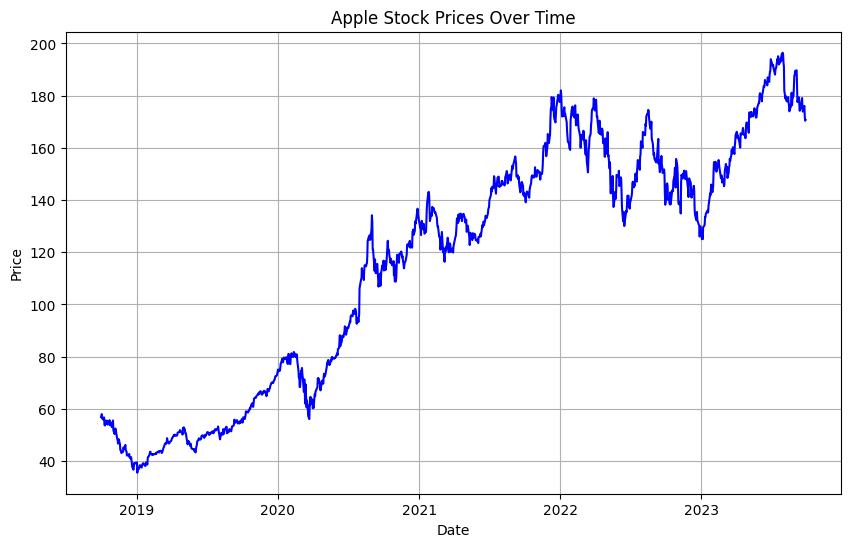

In [22]:
## producing a line plot for apple stock price
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(apple_series.index, apple_series, color='blue', linestyle='-')
plt.title('Apple Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

**From the analysis, there is an upward trend but no apparent seasonal trend can be seen and this is not a stationary series but to make sure I will perform ADF test**

In [28]:
from statsmodels.tsa.stattools import adfuller, acf, pacf, q_stat
from statsmodels.graphics.tsaplots import plot_acf
# Perform Augmented Dickey-Fuller test
result = adfuller(apple_series)

# Extracting test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Print the results
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)


ADF Statistic: -0.9671132548929573
p-value: 0.7650692611897277


* H0 : the series is non-stationary
* H1 : the series is stationary

Since the p-value is too high, cannot reject H0 and this is the non-stationary series. So, I will transform this data set using differencing.

### Feature Engineering

In [29]:
differenced_apple_series = apple_series.diff().dropna(inplace=True)

In [30]:
print(differenced_apple_series)

Date
2018-10-01         NaN
2018-10-02    0.505001
2018-10-03    0.697502
2018-10-04   -1.020001
2018-10-05   -0.925003
                ...   
2023-09-22    0.860000
2023-09-25    1.290009
2023-09-26   -4.119995
2023-09-27   -1.530014
2023-09-28    0.260009
Name: Apple, Length: 1257, dtype: float64


In [35]:
differenced_apple_series.

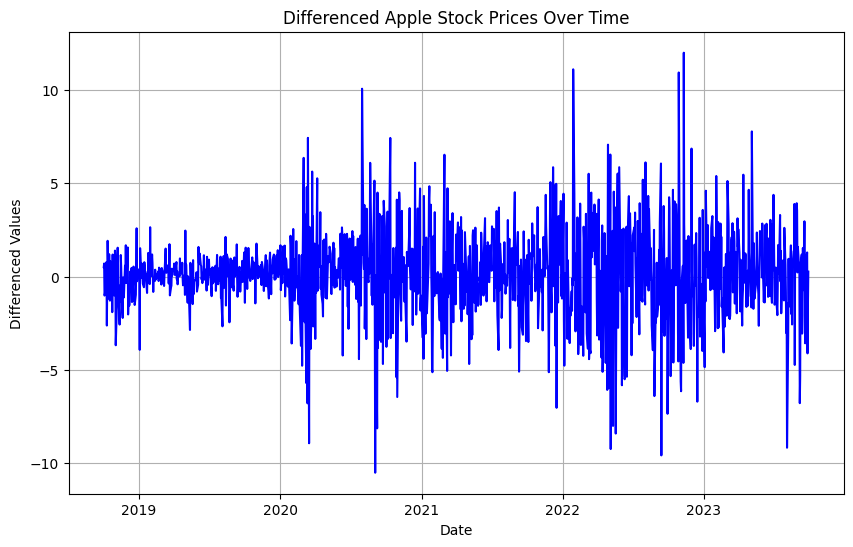

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(differenced_apple_series.index, differenced_apple_series, color='blue', linestyle='-')
plt.title('Differenced Apple Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Values')
plt.grid(True)
plt.show()

In [40]:

result_diff = adfuller(differenced_apple_series)

# Extract test statistic and p-value
adf_statistic_diff = result_diff[0]
p_value_diff = result_diff[1]

# Print the results of the test
print("\nADF Statistic (after differencing):", adf_statistic_diff)
print("p-value (after differencing):", p_value_diff)


ADF Statistic (after differencing): -36.90387008785629
p-value (after differencing): 0.0


### Finding is there any autocorrelation or not 

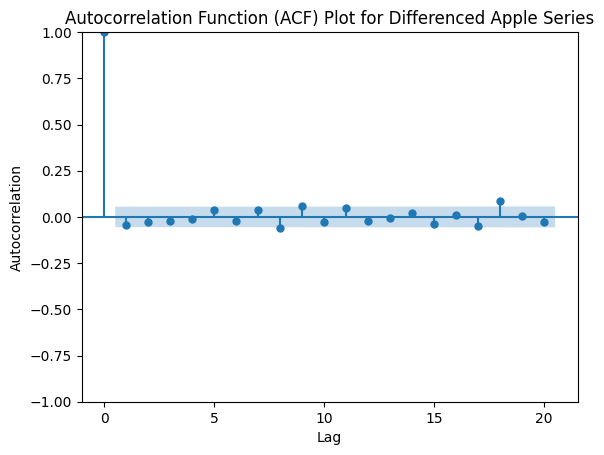

In [38]:
### Plotting ACF for the differenced series
plot_acf(differenced_apple_series, lags=20)
plt.title('Autocorrelation Function (ACF) Plot for Differenced Apple Series')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

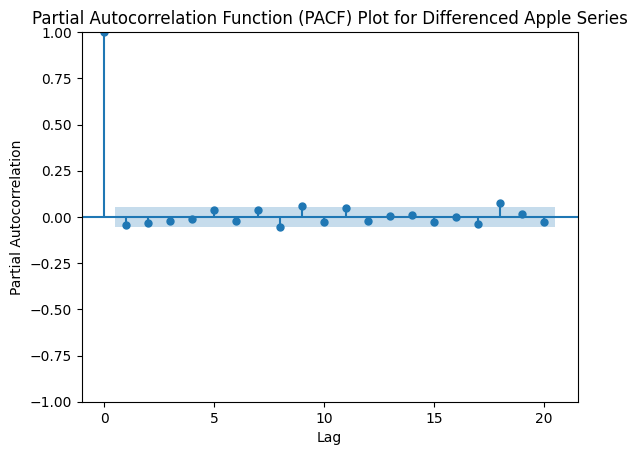

In [45]:
## Producing Pacf plot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(differenced_apple_series, lags=20)
plt.title('Partial Autocorrelation Function (PACF) Plot for Differenced Apple Series')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [43]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
### Ljung-Box test for the differenced apple series
lb_test_result = sm.stats.acorr_ljungbox(differenced_apple_series, lags=[20], return_df=True)
lbtest_pvalue = lb_test_result['lb_pvalue']
print(f"p-value of Ljung-Box Test: {lbtest_pvalue}")

p-value of Ljung-Box Test: 20    0.008756
Name: lb_pvalue, dtype: float64


**There is no apparent autocorrelation  can be seeen from the ACF plot, from p-value of Ljung-Box test where its p-value<0.05 there seems to be some small autocorrelation but I will try log differencing whether i can see more autocorrelation**

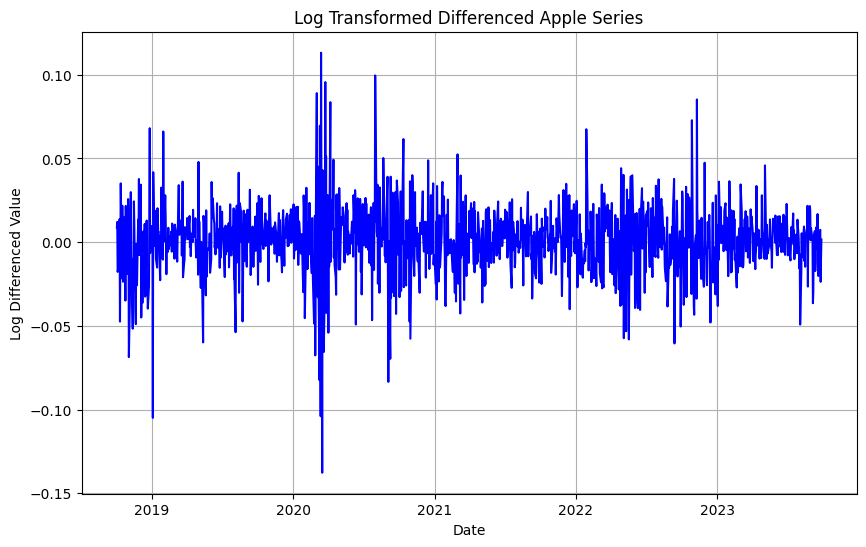

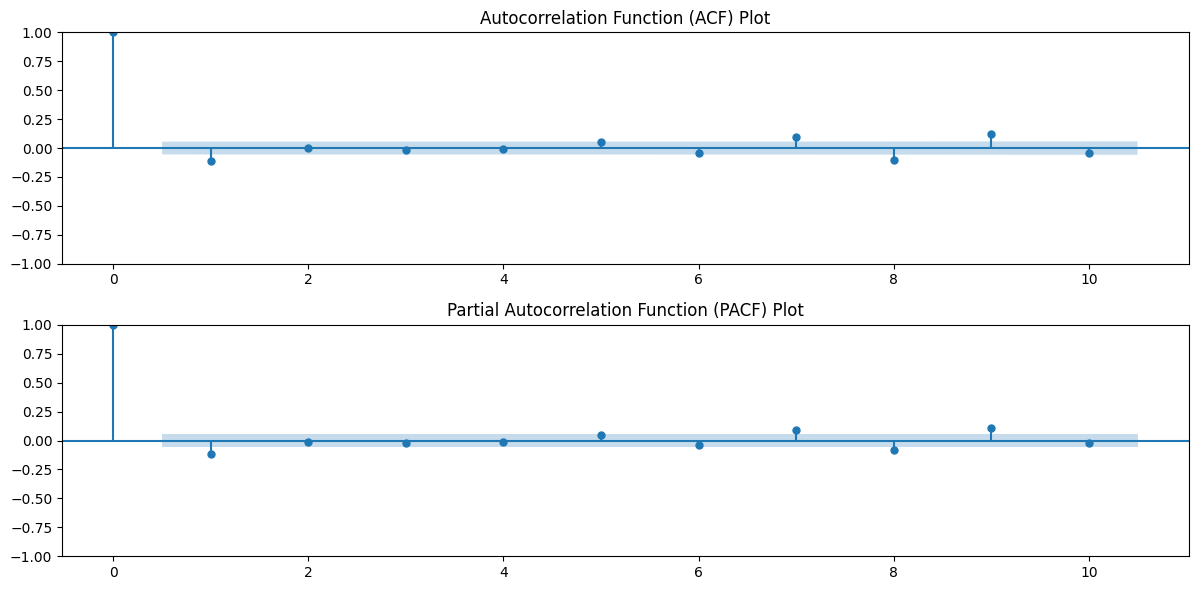


ADF Statistic (after log and differencing): -10.783398403021726
p-value (after log and differencing): 2.225475616408095e-19
p-value of Ljung-Box Test for log_differenced series: 10    5.126970e-11
Name: lb_pvalue, dtype: float64


In [48]:
import numpy as np
# Log transformation
log_differenced_series = np.log(apple_series).diff().dropna()

# Plot log-transformed differenced data
plt.figure(figsize=(10, 6))
plt.plot(log_differenced_series, color='blue')
plt.title('Log Transformed Differenced Apple Series')
plt.xlabel('Date')
plt.ylabel('Log Differenced Value')
plt.grid(True)
plt.show()

# Perform ACF and PACF plots
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(log_differenced_series, lags=10, ax=plt.gca(), title='Autocorrelation Function (ACF) Plot')
plt.subplot(2, 1, 2)
plot_pacf(log_differenced_series, lags=10, ax=plt.gca(), title='Partial Autocorrelation Function (PACF) Plot')
plt.tight_layout()
plt.show()

result_diff = adfuller(log_differenced_series)


adf_statistic_diff = result_diff[0]
p_value_diff = result_diff[1]
## ADF Test
print("\nADF Statistic (after log and differencing):", adf_statistic_diff)
print("p-value (after log and differencing):", p_value_diff)


## acorr ljungbox test
lb_test_result = sm.stats.acorr_ljungbox(log_differenced_series, lags=[10], return_df=True)
lbtest_pvalue = lb_test_result['lb_pvalue']
print(f"p-value of Ljung-Box Test for log_differenced series: {lbtest_pvalue}")

**So, I will use this logged series for modeling because its p-value for ADF test and p-value for Ljung-Box test are so much smaller**

### Modelling 

**Splitting the data series into train and test sets**

In [49]:
 # Split the data into 80% train, 20% test
split_index = int(len(apple_series) * 0.8) 
train_data = apple_series.iloc[:split_index]
test_data = apple_series.iloc[split_index:]

In [58]:
train_data

Date
2018-10-01     56.814999
2018-10-02     57.320000
2018-10-03     58.017502
2018-10-04     56.997501
2018-10-05     56.072498
                 ...    
2022-09-21    153.720001
2022-09-22    152.740005
2022-09-23    150.429993
2022-09-26    150.770004
2022-09-27    151.759995
Name: Apple, Length: 1005, dtype: float64

In [64]:
test_data

Date
2022-09-28    149.839996
2022-09-29    142.479996
2022-09-30    138.199997
2022-10-03    142.449997
2022-10-04    146.100006
                 ...    
2023-09-22    174.789993
2023-09-25    176.080002
2023-09-26    171.960007
2023-09-27    170.429993
2023-09-28    170.690002
Name: Apple, Length: 252, dtype: float64

In [51]:
from statsmodels.tsa.arima.model import ARIMA

# the first spike found at 1 both for PACF and ACF 
p = 1  
d = 1  
q = 1 


arima_model = ARIMA(np.log(train_data), order=(p, d, q))
arima_result = arima_model.fit()


print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Apple   No. Observations:                 1005
Model:                 ARIMA(1, 1, 1)   Log Likelihood                2424.424
Date:                Thu, 08 Feb 2024   AIC                          -4842.848
Time:                        12:56:49   BIC                          -4828.113
Sample:                             0   HQIC                         -4837.249
                               - 1005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1678      0.146     -1.152      0.249      -0.453       0.118
ma.L1          0.0326      0.152      0.215      0.830      -0.264       0.330
sigma2         0.0005   1.27e-05     36.779      0.0

C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### Model Evaluation

**From Ljung-Box Test, p-value is 0.93, indicating that there is no significant autocorrelation in the residual. And For Heteroskedasticity p-value is 0.57, suggesting that there is no significant heteroskedasticity in the residuals so the models seems to be good.**

C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


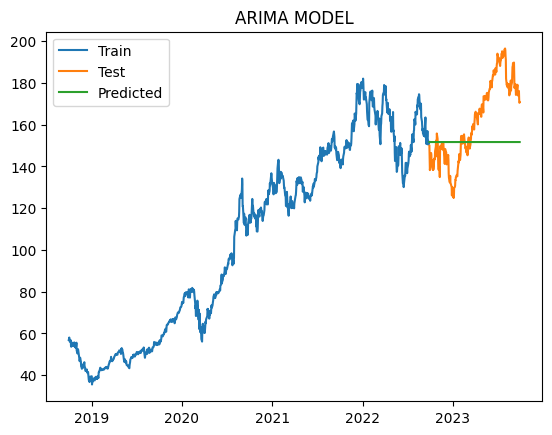

In [69]:
### Performing visualization for the model evaluation

predictions = np.exp(arima_result.predict(start=len(train_data), 
                                            end=len(train_data)+len(test_data)-1))


plt.figure()
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='Predicted')
plt.title('ARIMA MODEL')
plt.legend()
plt.show()

In [60]:
predictions

1005    151.627587
1006    151.649800
1007    151.646072
1008    151.646698
1009    151.646593
           ...    
1252    151.646608
1253    151.646608
1254    151.646608
1255    151.646608
1256    151.646608
Name: predicted_mean, Length: 252, dtype: float64

In [62]:
test_data

Date
2022-09-28    149.839996
2022-09-29    142.479996
2022-09-30    138.199997
2022-10-03    142.449997
2022-10-04    146.100006
                 ...    
2023-09-22    174.789993
2023-09-25    176.080002
2023-09-26    171.960007
2023-09-27    170.429993
2023-09-28    170.690002
Name: Apple, Length: 252, dtype: float64

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test_data.values, predictions.values)
print("Mean Absolute Error (MAE) of ARIMA: ", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data.values, predictions.values)
print("Mean Squared Error (MSE) of ARIMA: ", mse)

Mean Absolute Error (MAE) of ARIMA:  17.639167473828127
Mean Squared Error (MSE) of ARIMA:  467.61555701395537


**So, the predictions are flat and the model is not a good fit, So, I will improve the model, using a different model which is 
SARIMAX**

### Model Improvement

In [63]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarimax_model = SARIMAX(np.log(train_data), 
                       order=(1,1,1), 
                       seasonal_order=(1,1,1,12), 
                       enforce_stationarity=False, 
                       enforce_invertibility=False)

sarimax_result = sarimax_model.fit(maxiter=500, method='nm',  
                                 disp=False)  


if not sarimax_result.mle_retvals['converged']:
    print("Optimization did not converge. Try increasing the number of iterations or changing the model.")


# Print out the summary of the model
print(sarimax_result.summary())

C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Apple   No. Observations:                 1005
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                2334.761
Date:                            Thu, 08 Feb 2024   AIC                          -4659.522
Time:                                    13:29:30   BIC                          -4635.095
Sample:                                         0   HQIC                         -4650.228
                                           - 1005                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1985      0.152     -1.307      0.191      -0.496       0.099
ma.L1          0.0668      0.158   

**So, this model seems to be better than ARIMA model because of increased value of p in Ljung-Box and Heteroskedasticity**

C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


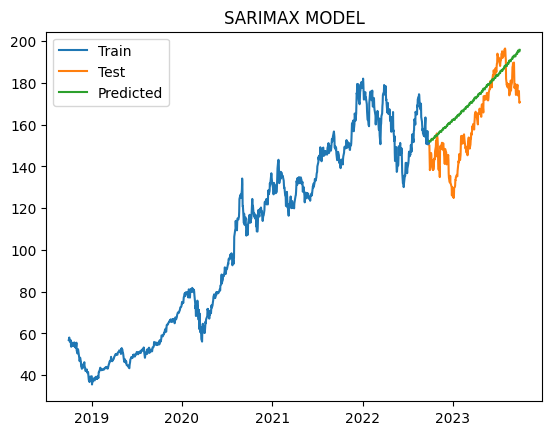

In [66]:
### Performing visualization for the model evaluation of SARIMAX
predictions = np.exp(sarimax_result.predict(start=len(train_data), 
                                            end=len(train_data)+len(test_data)-1))


plt.figure()
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='Predicted')
plt.title('SARIMAX MODEL')
plt.legend()
plt.show()

In [67]:
predictions

1005    152.002361
1006    151.934782
1007    152.166509
1008    151.900015
1009    152.642410
           ...    
1252    195.487970
1253    195.191875
1254    195.267095
1255    195.015727
1256    195.803216
Name: predicted_mean, Length: 252, dtype: float64

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test_data.values, predictions.values)
print("Mean Absolute Error (MAE) of SARIMAX: ", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data.values, predictions.values)
print("Mean Squared Error (MSE) of SARIMAX: ", mse)

Mean Absolute Error (MAE) of SARIMAX:  12.632615547680158
Mean Squared Error (MSE) of SARIMAX:  226.34262392281963


**Although there is no a perfectly good fit yet, the predictions can now make predict for upward trend unlike ARIMA and so it can be said that SARIMAX is a better model and the MAE and MSE also becomes better**

### Hyperparameter Tuning for SARIMAX model 

**From ACF and PACF plot both p and q values 1,7,8, and 9**

In [73]:
## getting the combinations of p and q values
import itertools
p_values = [1, 7, 8, 9]
q_values = [1, 7, 8, 9]

# Generate all possible combinations of p and q values
pq_combinations = list(itertools.product(p_values, q_values))

In [74]:
print(pq_combinations)

[(1, 1), (1, 7), (1, 8), (1, 9), (7, 1), (7, 7), (7, 8), (7, 9), (8, 1), (8, 7), (8, 8), (8, 9), (9, 1), (9, 7), (9, 8), (9, 9)]


In [77]:
### Finding the best model
best_model_apple = None
best_aic_apple = float("inf")

for p, q in pq_combinations:
   
    sarimax_model = SARIMAX(np.log(train_data), 
                       order=(p,1,q))
    sarimax_result = sarimax_model.fit()

    
    ### Current AIC value
    current_aic = sarimax_result.aic
    
    ## finding the best model
    if current_aic < best_aic_apple:
        best_model_apple = sarimax_result
        best_aic_apple = current_aic
        best_order = (p, 1, q)


print("Best SARIMAX Model Order (p, d, q):", best_order)
print("Best AIC Value:", best_aic_apple)


print(best_model_apple.summary())

C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodel

C:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

Best SARIMAX Model Order (p, d, q): (9, 1, 1)
Best AIC Value: -4860.529247289345
                               SARIMAX Results                                
Dep. Variable:                  Apple   No. Observations:                 1005
Model:               SARIMAX(9, 1, 1)   Log Likelihood                2441.265
Date:                Thu, 08 Feb 2024   AIC                          -4860.529
Time:                        14:31:32   BIC                          -4806.500
Sample:                             0   HQIC                         -4839.998
                               - 1005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0558      0.280     -0.199      0.842      -0.605       0.493
ar.L2         -0.0076      0.044     -0.172      0

C:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**So, the best order is (9, 1, 1). I will use that to train the best model**

In [82]:
best_apple_model = SARIMAX(np.log(train_data), 
                       order=(9,1,1), 
                       seasonal_order=(1,1,1,30), 
                       enforce_stationarity=False, 
                       enforce_invertibility=False)

best_appleModel_sarimax_result = best_apple_model.fit(maxiter=500, method='nm',  
                                 disp=False)  


if not best_appleModel_sarimax_result.mle_retvals['converged']:
    print("Optimization did not converge. Try increasing the number of iterations or changing the model.")


# Print out the summary of the model
print(best_appleModel_sarimax_result.summary())

C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization did not converge. Try increasing the number of iterations or changing the model.
                                     SARIMAX Results                                      
Dep. Variable:                              Apple   No. Observations:                 1005
Model:             SARIMAX(9, 1, 1)x(1, 1, 1, 30)   Log Likelihood                2238.624
Date:                            Thu, 08 Feb 2024   AIC                          -4451.249
Time:                                    14:51:23   BIC                          -4388.321
Sample:                                         0   HQIC                         -4427.254
                                           - 1005                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.091

C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


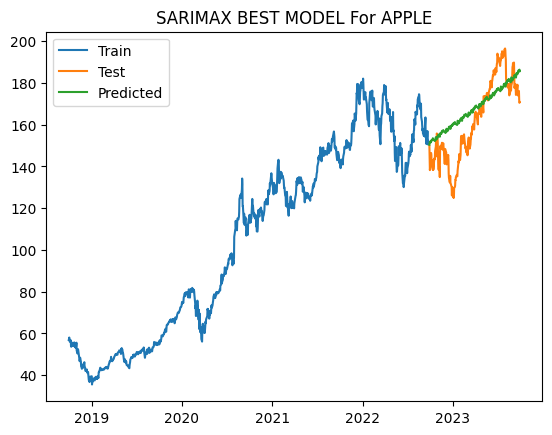

In [83]:
### Performing visualization for the model evaluation of SARIMAX
predictions = np.exp(best_appleModel_sarimax_result.predict(start=len(train_data), 
                                            end=len(train_data)+len(test_data)-1))


plt.figure()
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='Predicted')
plt.title('SARIMAX BEST MODEL For APPLE')
plt.legend()
plt.show()

In [84]:
mae = mean_absolute_error(test_data.values, predictions.values)
print("Mean Absolute Error (MAE) of SARIMAX BEST MODEL: ", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data.values, predictions.values)
print("Mean Squared Error (MSE) of SARIMAX BEST MODEL: ", mse)

Mean Absolute Error (MAE) of SARIMAX BEST MODEL:  10.73081306174856
Mean Squared Error (MSE) of SARIMAX BEST MODEL:  172.9246229166248


### After hyperparameter tuning both MAE and MSE becomes the smallest this seems to be the best model and there is some fluctuations in some predicted values rather than a straight line values so this seems to be more precise and this may be due to the number of seasonality period is increased

### Predicting the APPLE stock price for next 60 days

In [87]:
### Forecasting next 60 apple stock prices
forecast_apple_values = np.exp(best_appleModel_sarimax_result.forecast(steps=60))

# Print or use the forecast values as needed
print("Forecasted values for the next 60 data points for APPLE:")
print(forecast_apple_values[:10])

Forecasted values for the next 60 data points for APPLE:
1005    150.346604
1006    150.999380
1007    151.727799
1008    151.929022
1009    151.493297
1010    152.227444
1011    152.021166
1012    152.636172
1013    152.644792
1014    152.671858
Name: predicted_mean, dtype: float64


C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# Building Model for Amazon Stock Price

### Data Exploration and visualization for Amazon Stock Price

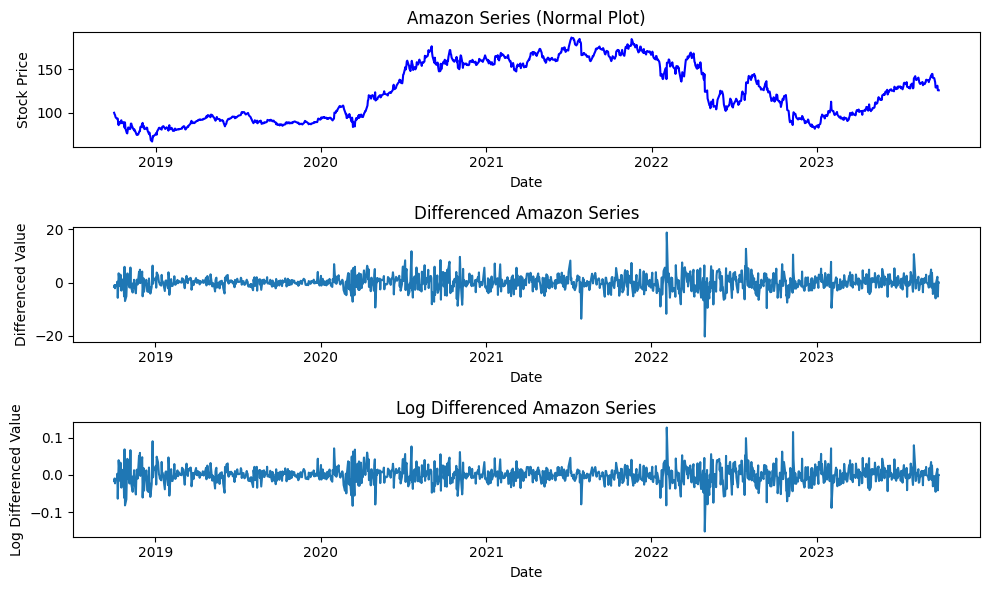

In [91]:
### defining a function to produce normal plot, differenced plot and logged differenced plot
def produceThreePlots(series,name):
    plt.figure(figsize=(10, 6))
    plt.subplot(3, 1, 1)
    plt.plot(series.index,series, color='blue', linestyle='-')
    plt.title(f'{name} (Normal Plot)')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')

   
    diff_series = series.diff().dropna()
    plt.subplot(3, 1, 2)
    plt.plot(diff_series)
    plt.title(f'Differenced {name}')
    plt.xlabel('Date')
    plt.ylabel('Differenced Value')

    
    log_diff_series = np.log(series).diff().dropna()
    plt.subplot(3, 1, 3)
    plt.plot(log_diff_series)
    plt.title(f'Log Differenced {name}')
    plt.xlabel('Date')
    plt.ylabel('Log Differenced Value')

    plt.tight_layout()
    plt.show()
produceThreePlots(amazon_series,"Amazon Series")

**So,from the plots, the normal values is non-stationary because its mean and variance are changing. Differenced and log differenced series are almost the same, So after analyzing the ADF test, and there is no difference I will choose the differenced Amazon Series**

In [90]:
### defing a function for performing ADF test
def adf_test_and_print(series, name):
    result = adfuller(series)
    print(f'ADF Test for {name}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}\n')
   
diff_amazon_series= amazon_series.diff().dropna()
adf_test_and_print(amazon_series, 'Amazon Series (Original)')

adf_test_and_print(diff_amazon_series, 'Amazon Series (Differenced)')

log_diff_amazon_series = np.log(amazon_series).diff().dropna()
adf_test_and_print(log_diff_amazon_series, 'Amazon Series (Log Differenced)')

ADF Test for Amazon Series (Original):
ADF Statistic: -1.6469093886351958
p-value: 0.45865276453651455

ADF Test for Amazon Series (Differenced):
ADF Statistic: -36.30230764499734
p-value: 0.0

ADF Test for Amazon Series (Log Differenced):
ADF Statistic: -36.68825550116714
p-value: 0.0



**Here p-value=0 < 0.05 of differenced series and log differenced series are almost the same so I will choose the differenced series which is stationary for model training**

In [111]:
### defining a function to find the autocorrelation using acf plot and ljungBox Test
def acf_plot_pacf_plot_AndLjungBoxtest(series,name):
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plot_acf(series, lags=15, ax=plt.gca(), title=f'Autocorrelation Function (ACF) Plot for {name}')
    plt.subplot(2, 1, 2)
    plot_pacf(series, lags=15, ax=plt.gca(), title=f'Partial Autocorrelation Function (PACF) Plot for {name}')
    plt.tight_layout()
    plt.show()


    result_ljungbox = sm.stats.acorr_ljungbox(series, lags=[20],return_df=True)
    print(f"Ljung-Box Test for {name}:")
    print("p-values:", result_ljungbox['lb_pvalue'])

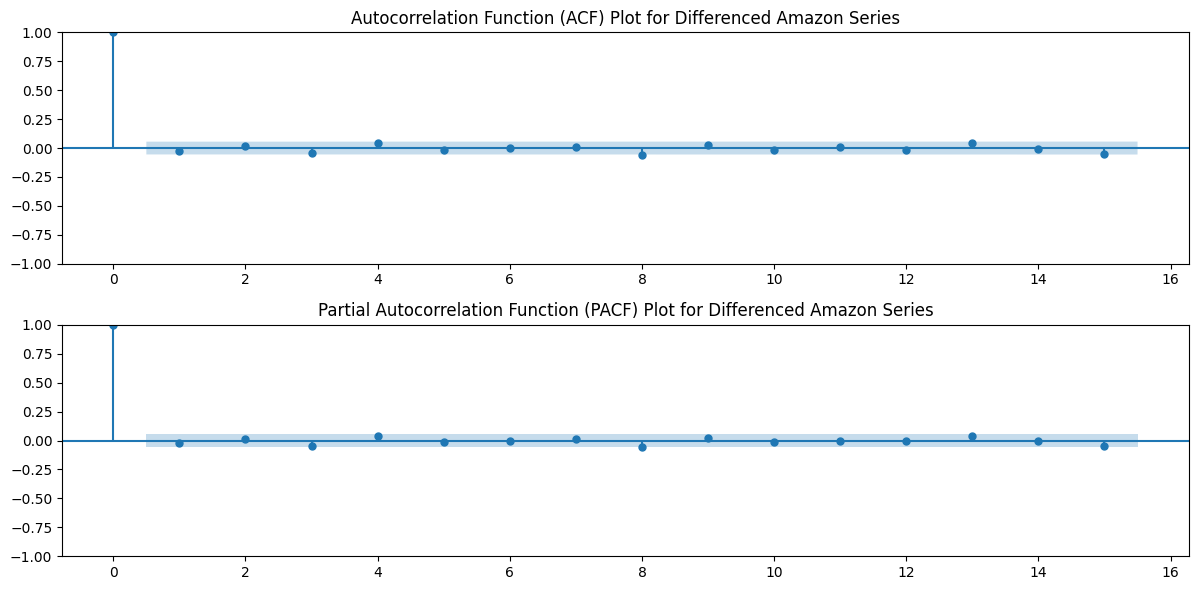

Ljung-Box Test for Differenced Amazon Series:
p-values: 20    0.412659
Name: lb_pvalue, dtype: float64


In [113]:
diff_amazon_series = amazon_series.diff().dropna()
acf_plot_pacf_plot_AndLjungBoxtest(diff_amazon_series,'Differenced Amazon Series')

**Although the differeenced Amazon series is stationary, there is no autocorrelation, because p-value(0.41) is too high**

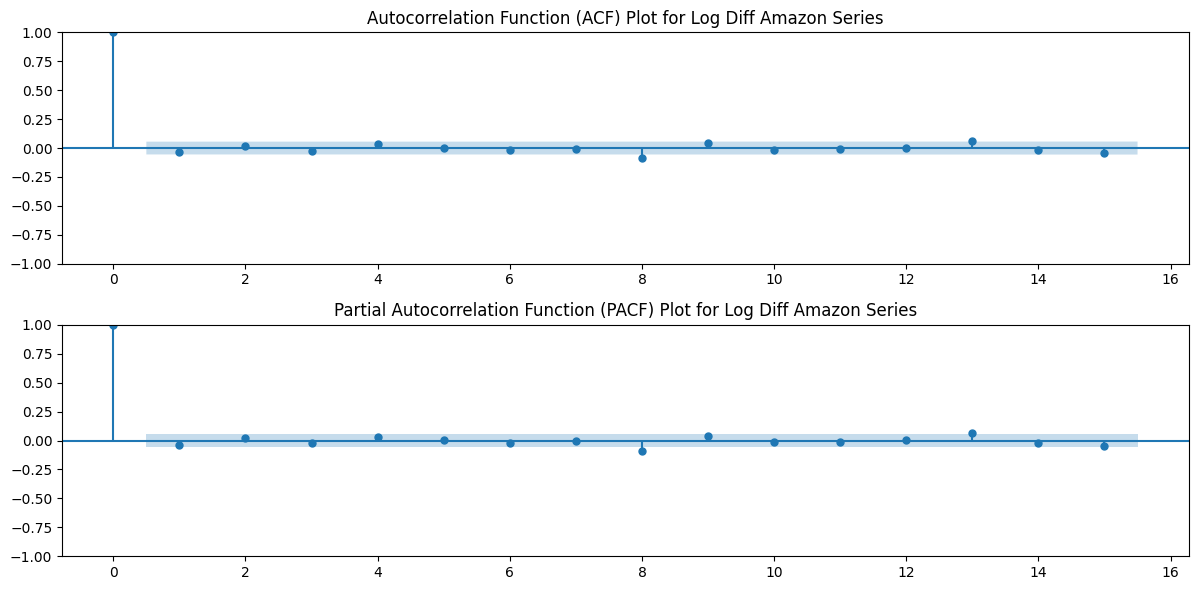

Ljung-Box Test for Log Diff Amazon Series:
p-values: 20    0.087081
Name: lb_pvalue, dtype: float64


In [112]:
log_diff_series_Amazon = np.log(amazon_series).diff().dropna()
acf_plot_pacf_plot_AndLjungBoxtest(log_diff_series_Amazon,'Log Diff Amazon Series')

**Log differenced series also have no auto correlation**

### Modeling for Amazon Series

**So, I will use log series to build the model but I expect the model will perform poorly because there is no autocorrelation**

In [131]:
### splitting the data 
train_data_amazon = amazon_series.iloc[:split_index]
test_data_amazon = amazon_series.iloc[split_index:]

In [137]:
sarimax_model_amazon = SARIMAX(np.log(train_data_amazon), 
                       order=(8,1,8), ## I used 8 here for p and q because the projections seem to start from 8 from acf and pacf
                       seasonal_order=(1,1,1,12), 
                       enforce_stationarity=False, 
                       enforce_invertibility=False)

sarimax_result_amazon = sarimax_model.fit(maxiter=500, method='nm',  
                                 disp=False)  


if not sarimax_result_amazon.mle_retvals['converged']:
    print("Optimization did not converge. Try increasing the number of iterations or changing the model.")


# Print out the summary of the model
print(sarimax_result_amazon.summary())

C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization did not converge. Try increasing the number of iterations or changing the model.
                                      SARIMAX Results                                       
Dep. Variable:                               Amazon   No. Observations:                 1005
Model:             SARIMAX(8, 1, 8)x(1, 1, [1], 12)   Log Likelihood                2286.097
Date:                              Thu, 08 Feb 2024   AIC                          -4534.193
Time:                                      17:42:29   BIC                          -4441.505
Sample:                                           0   HQIC                         -4498.915
                                             - 1005                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L

### Model Evaluation

**So, Ljung-Box test for residual is high which means residuals has no correlation but there is Heteroskedasticity which is not  a good sign, the model misses certain pattern of data to capture.**

C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


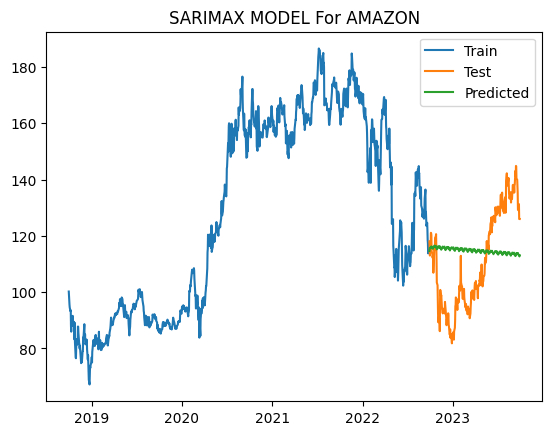

In [138]:
### Performing visualization for the model evaluation of SARIMAX
predictions = np.exp(sarimax_result_amazon.predict(start=len(train_data_amazon), 
                                            end=len(train_data_amazon)+len(test_data_amazon)-1))


plt.figure()
plt.plot(train_data_amazon.index, train_data_amazon, label='Train')
plt.plot(test_data_amazon.index, test_data_amazon, label='Test')
plt.plot(test_data_amazon.index, predictions, label='Predicted')
plt.title('SARIMAX MODEL For AMAZON')
plt.legend()
plt.show()

In [139]:
mae = mean_absolute_error(test_data_amazon.values, predictions.values)
print("Mean Absolute Error (MAE) of SARIMAX AMAZON MODEL: ", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data_amazon.values, predictions.values)
print("Mean Squared Error (MSE) of SARIMAX AMAZON MODEL: ", mse)

Mean Absolute Error (MAE) of SARIMAX AMAZON MODEL:  16.36604010584355
Mean Squared Error (MSE) of SARIMAX AMAZON MODEL:  333.5013750086112


### Forecasting the AMAZON stock Price for next 60 days 


In [141]:
forecast_apple_values = np.exp(sarimax_result_amazon.forecast(steps=60))

# Print or use the forecast values as needed
print("Forecasted values for the next 60 STOCK PRICES for AMAZON:")
print(forecast_apple_values[:10])

Forecasted values for the next 60 STOCK PRICES for AMAZON:
1005    114.638355
1006    115.181962
1007    115.752192
1008    115.829518
1009    115.900807
1010    115.816068
1011    116.244991
1012    116.158707
1013    115.819162
1014    115.881297
Name: predicted_mean, dtype: float64


C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## Training The Time Series Model for DBS stock price

### Data Exploration and Visualization

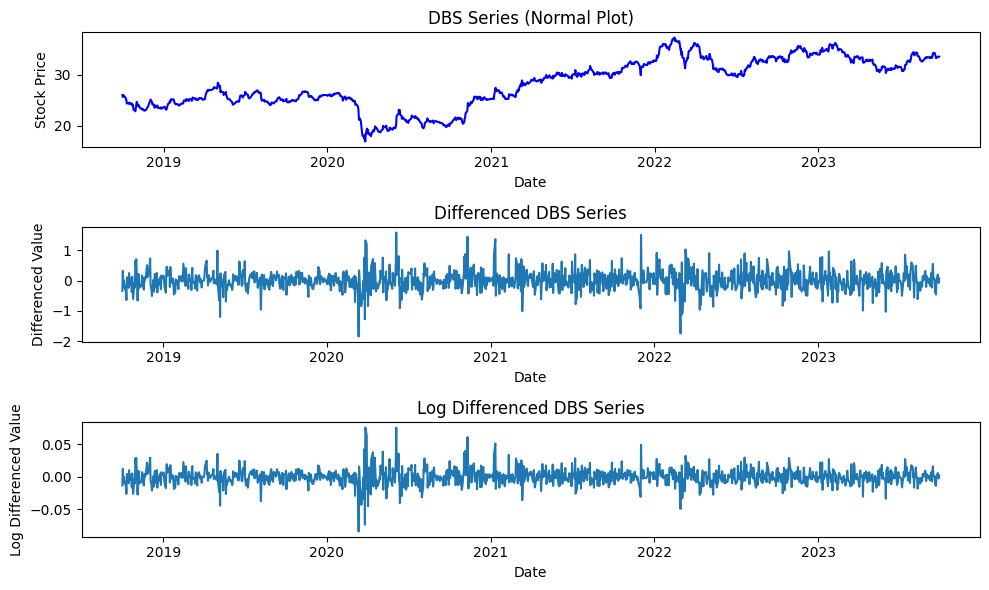

In [142]:
produceThreePlots(dbs_series,"DBS Series")

In [143]:
   
diff_dbs_series= dbs_series.diff().dropna()
adf_test_and_print(dbs_series, 'DBS Series (Original)')

adf_test_and_print(diff_dbs_series, 'DBS Series (Differenced)')

log_diff_dbs_series = np.log(dbs_series).diff().dropna()
adf_test_and_print(log_diff_dbs_series, 'DBS Series (Log Differenced)')

ADF Test for DBS Series (Original):
ADF Statistic: -1.2410793508914997
p-value: 0.655679620173204

ADF Test for DBS Series (Differenced):
ADF Statistic: -22.064690080420252
p-value: 0.0

ADF Test for DBS Series (Log Differenced):
ADF Statistic: -13.351469647132983
p-value: 5.657346666071357e-25



**From the analysis of the graphs and the ADF test normal time series is not a stationary but differenced and log differenced series are stationary**

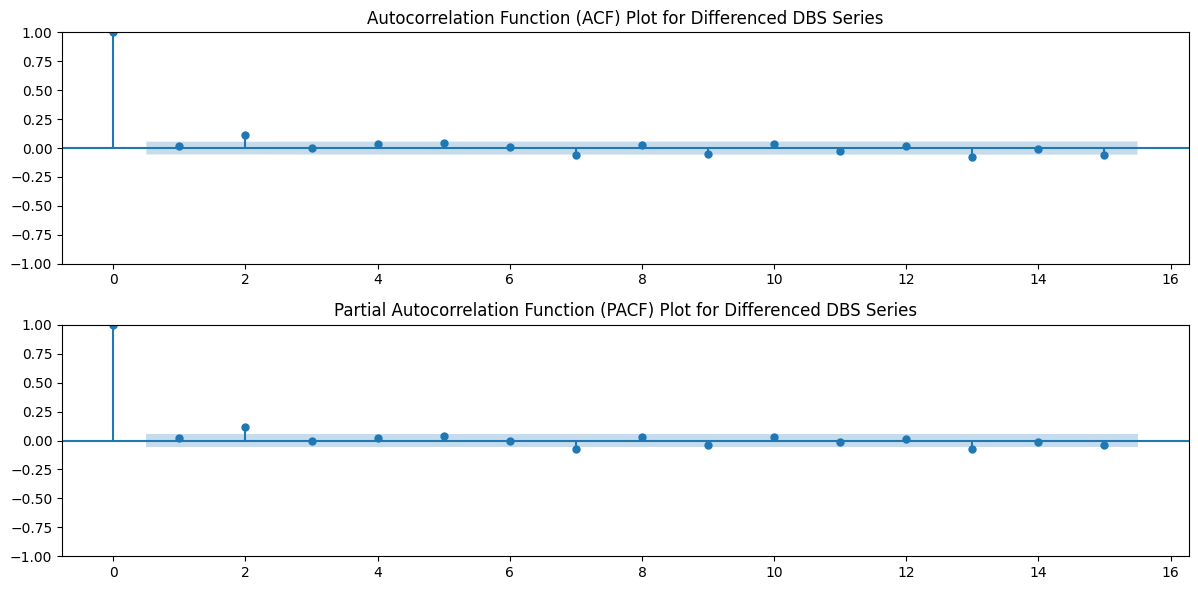

Ljung-Box Test for Differenced DBS Series:
p-values: 20    0.000446
Name: lb_pvalue, dtype: float64


In [144]:

acf_plot_pacf_plot_AndLjungBoxtest(diff_dbs_series,'Differenced DBS Series')

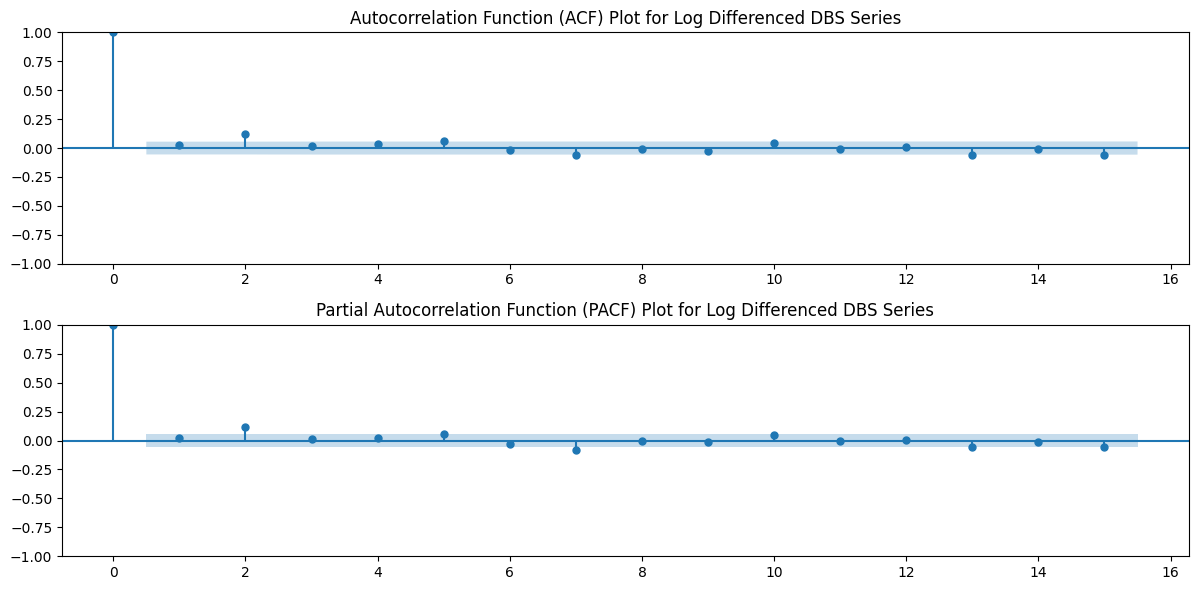

Ljung-Box Test for Log Differenced DBS Series:
p-values: 20    0.000254
Name: lb_pvalue, dtype: float64


In [145]:
acf_plot_pacf_plot_AndLjungBoxtest(log_diff_dbs_series,'Log Differenced DBS Series')

**Now I will use log differenced values because it has less p-value than differenced DBS series**

### Modeling and Model Evaluation

In [147]:
### splitting the data 
train_data_dbs = dbs_series.iloc[:split_index]
test_data_dbs = dbs_series.iloc[split_index:]

In [157]:
sarimax_model_dbs = SARIMAX(np.log(train_data_dbs), 
                       order=(2,1,2), ## according to ACF and PACF 
                       seasonal_order=(2,1,2,12), 
                       enforce_stationarity=False, 
                       enforce_invertibility=False)

sarimax_result_dbs = sarimax_model_dbs.fit(maxiter=500, method='nm',  
                                 disp=False)  


if not sarimax_result_dbs.mle_retvals['converged']:
    print("Optimization did not converge. Try increasing the number of iterations or changing the model.")


# Print out the summary of the model
print(sarimax_result_dbs.summary())

C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization did not converge. Try increasing the number of iterations or changing the model.
                                     SARIMAX Results                                      
Dep. Variable:                                DBS   No. Observations:                 1005
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                2792.703
Date:                            Thu, 08 Feb 2024   AIC                          -5567.407
Time:                                    18:13:24   BIC                          -5523.558
Sample:                                         0   HQIC                         -5550.712
                                           - 1005                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.182

**So, from the mode summary, the residual has no autocorrelation which is a good characteristics but there is Heteroskedasticity** 

C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


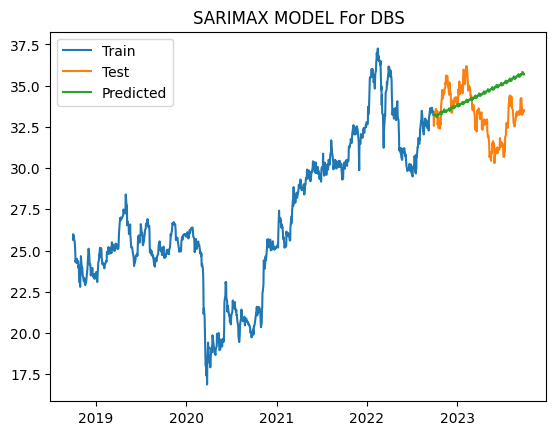

In [167]:
### Performing visualization for the model evaluation of SARIMAX
predictions_dbs_model = np.exp(sarimax_result_dbs.predict(start=len(train_data_dbs), 
                                            end=len(train_data_dbs)+len(test_data_dbs)-1))


plt.figure()
plt.plot(train_data_dbs.index, train_data_dbs, label='Train')
plt.plot(test_data_dbs.index, test_data_dbs, label='Test')
plt.plot(test_data_dbs.index, predictions_dbs, label='Predicted')
plt.title('SARIMAX MODEL For DBS')
plt.legend()
plt.show()

In [169]:
mae = mean_absolute_error(test_data_dbs.values, predictions_dbs_model.values)
print("Mean Absolute Error (MAE) of SARIMAX DBS MODEL: ", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data_dbs.values, predictions_dbs_model.values)
print("Mean Squared Error (MSE) of SARIMAX DBS MODEL: ", mse)

Mean Absolute Error (MAE) of SARIMAX DBS MODEL:  2.0545001658542463
Mean Squared Error (MSE) of SARIMAX DBS MODEL:  6.384139882011086


### Model Improvement

In [159]:
## performing hyperparameter tuning
### Finding the best model
p_values = [2, 5, 7, 10]
q_values = [2, 5, 7, 10]

pq_combinations = list(itertools.product(p_values, q_values))
best_model_dbs = None
best_aic_dbs = float("inf")

for p, q in pq_combinations:
   
    sarimax_model = SARIMAX(np.log(train_data_dbs), 
                       order=(p,1,q))
    sarimax_result = sarimax_model.fit()

    
    ### Current AIC value
    current_aic = sarimax_result.aic
    
    3## finding the best model
    if current_aic < best_aic_dbs:
        best_model_dbs = sarimax_result
        best_aic_dbs = current_aic
        best_order = (p, 1, q)


print("Best SARIMAX Model Order (p, d, q):", best_order)
print("Best AIC Value:", best_aic_dbs)


print(best_model_dbs.summary())

C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodel

C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

Best SARIMAX Model Order (p, d, q): (2, 1, 5)
Best AIC Value: -5852.704129617165
                               SARIMAX Results                                
Dep. Variable:                    DBS   No. Observations:                 1005
Model:               SARIMAX(2, 1, 5)   Log Likelihood                2934.352
Date:                Thu, 08 Feb 2024   AIC                          -5852.704
Time:                        18:19:56   BIC                          -5813.410
Sample:                             0   HQIC                         -5837.773
                               - 1005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1402      0.238      0.589      0.556      -0.326       0.607
ar.L2         -0.3429      0.182     -1.882      0

C:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**So, AIC value becomes smaller than the eailer model which indicates that the model has improved**

In [163]:
## Training best model with the best value
sarimax_model_dbs = SARIMAX(np.log(train_data_dbs), 
                       order=(2,1,5), 
                       seasonal_order=(2,1,5,12), 
                       enforce_stationarity=False, 
                       enforce_invertibility=False)

best_dbs_model = sarimax_model_dbs.fit(maxiter=500, method='nm',  
                                 disp=False)  


if not sarimax_result_dbs.mle_retvals['converged']:
    print("Optimization did not converge. Try increasing the number of iterations or changing the model.")


# Print out the summary of the model
print(best_dbs_model.summary())

C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization did not converge. Try increasing the number of iterations or changing the model.
                                     SARIMAX Results                                      
Dep. Variable:                                DBS   No. Observations:                 1005
Model:             SARIMAX(2, 1, 5)x(2, 1, 5, 12)   Log Likelihood                2685.128
Date:                            Thu, 08 Feb 2024   AIC                          -5340.256
Time:                                    18:31:48   BIC                          -5267.793
Sample:                                         0   HQIC                         -5312.612
                                           - 1005                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.689

C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


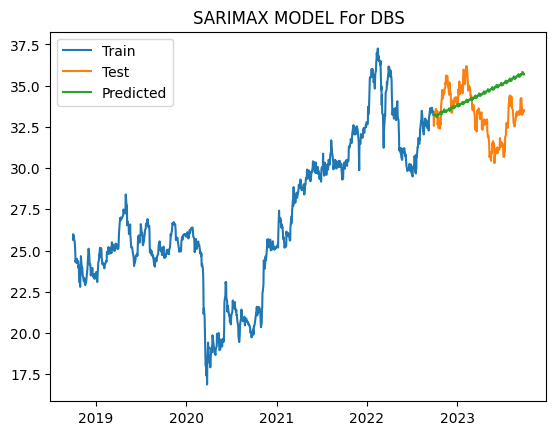

In [166]:
### Performing visualization for the best model evaluation of SARIMAX for DBS
predictions_dbs = np.exp(best_dbs_model.predict(start=len(train_data_dbs), 
                                            end=len(train_data_dbs)+len(test_data_dbs)-1))


plt.figure()
plt.plot(train_data_dbs.index, train_data_dbs, label='Train')
plt.plot(test_data_dbs.index, test_data_dbs, label='Test')
plt.plot(test_data_dbs.index, predictions_dbs, label='Predicted')
plt.title('SARIMAX MODEL For DBS')
plt.legend()
plt.show()

In [165]:

mae = mean_absolute_error(test_data_dbs.values, predictions_dbs.values)
print("Mean Absolute Error (MAE) of SARIMAX DBS BEST MODEL: ", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data_dbs.values, predictions_dbs.values)
print("Mean Squared Error (MSE) of SARIMAX DBS BEST MODEL: ", mse)

Mean Absolute Error (MAE) of SARIMAX DBS BEST MODEL:  1.7783548040266672
Mean Squared Error (MSE) of SARIMAX DBS BEST MODEL:  4.612092526485296


### So, the best model with the p and q values 2 and 5 respectively has lower MAE and MSE and AIC value also decrease which indicates the improvement of the model

**Forecasting the stock price of DBS for next 60 days**

In [171]:
forecast_dbs_values = np.exp(best_dbs_model.forecast(steps=60))

# Print or use the forecast values as needed
print("Forecasted values for the next 60 STOCK PRICES for DBS:")
print(forecast_dbs_values[:10])

Forecasted values for the next 60 STOCK PRICES for DBS:
1005    33.247541
1006    33.197729
1007    33.237337
1008    33.225027
1009    33.204970
1010    33.171936
1011    33.176165
1012    33.236930
1013    33.212768
1014    33.076791
Name: predicted_mean, dtype: float64


C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
